# 1. Load Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("haitranquangofficial/vietnamese-online-news-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'vietnamese-online-news-dataset' dataset.
Path to dataset files: /kaggle/input/vietnamese-online-news-dataset


In [2]:
import pandas as pd
import json
import os
import re

file_path = os.path.join(path, "news_dataset.json")
df = pd.read_json(file_path)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,218270,,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",3,0,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,218269,(Nguồn: Sina),"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,218268,Hồ Sỹ Anh,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,3,0,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,218267,Ngọc Ánh,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,1,0,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,218266,HẢI YẾN - MINH LÝ,Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


# 2. Text Preprocessing

## 2.1 Lower case

In [3]:
df['content'] = df['content'].str.lower()
df['content'][0]

"chiều 31/7, công an tỉnh thừa thiên - huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo (tp huế, tỉnh thừa thiên - huế). thông sài gòn giải phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi (phía trước chợ đông ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội, cách khu vực gây án khoảng 300m. giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhốn

## 2.2 Xóa đường dẫn
* Loại bỏ URL. Ví dụ: **https://**
* Loại bỏ đường dẫn. **Ví dụ: C:\folder\file.txt**
* Loại bỏ các khoảng trắng dài

In [4]:
def remove_url(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z]:\\[^\s]*', '', text)
    text = re.sub(r'\s+',' ',text)
    return text
df['content'] = df['content'].apply(remove_url)
df['content'][0]

"chiều 31/7, công an tỉnh thừa thiên - huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo (tp huế, tỉnh thừa thiên - huế). thông sài gòn giải phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi (phía trước chợ đông ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội, cách khu vực gây án khoảng 300m. giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhốn

## 2.3 Remove Punctuation

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
df['content'] = df['content'].str.translate(str.maketrans('', '', string.punctuation))
df['content'][0]

'chiều 317 công an tỉnh thừa thiên  huế đã có thông tin ban đầu về vụ nổ súngcướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo tp huế tỉnh thừa thiên  huế thông sài gòn giải phóng khoảng 12h30 ngày 317 một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi phía trước chợ đông ba rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng sau đó đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội cách khu vực gây án khoảng 300m giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ khoanh vùng và ngăn không để người dân đi vào hiện trường hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường đóng cửa nhà đề phòng đạn lạc tuy nhiên thấy vàng bị ném ra đường nhiều người đua nhau nhặt tạo cảnh nhốn nháo trước cổng chợ do đâ

## 2.4 Word Tokenize

In [7]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
df['word_tokenized_content'] = df['content'].apply(word_tokenize)
df['word_tokenized_content']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,word_tokenized_content
0,"[chiều, 317, công, an, tỉnh, thừa, thiên, huế,..."
1,"[gần, đây, thứ, trưởng, bộ, phát, triển, kỹ, t..."
2,"[kết, quả, thi, tốt, nghiệp, thpt, năm, 2022, ..."
3,"[thống, đốc, kentucky, andy, beshear, hôm, 317..."
4,"[vụ, tai, nạn, giao, thông, liên, hoàn, trên, ..."
...,...
184534,"[chiều, 76, khoa, bị, công, an, quận, phú, nhu..."
184535,"[ngày, 76, phiên, xử, phúc, thẩm, ông, tất, th..."
184536,"[các, khu, dân, cư, của, thành, phố, severodon..."
184537,"[việt, nam, malaysia, 20h, thứ, tư, 86, trên, ..."


## 2.5 Remove stopwords

In [8]:
path = kagglehub.dataset_download("heeraldedhia/stop-words-in-28-languages")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stop-words-in-28-languages' dataset.
Path to dataset files: /kaggle/input/stop-words-in-28-languages


In [9]:
vietnamese_stopwords_path = os.path.join(path, "vietnamese.txt")
Vi_stopwords = set()
with open(vietnamese_stopwords_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for line in lines:
    tmp = line.rstrip()
    tmp_no_digits = ''.join([i for i in tmp if not i.isdigit()])
    if tmp_no_digits.strip():
        Vi_stopwords.add(tmp_no_digits)

In [10]:
df['filter_stopwords'] = df['word_tokenized_content'].apply(lambda tokens: [token for token in tokens if token not in Vi_stopwords])
df['filter_stopwords']

,filter_stopwords
0,"[chiều, 317, công, an, tỉnh, thừa, thiên, huế,..."
1,"[trưởng, phát, triển, kỹ, thuật, truyền, thông..."
2,"[kết, thi, nghiệp, thpt, 2022, trung, bình, mô..."
3,"[thống, đốc, kentucky, andy, beshear, hôm, 317..."
4,"[vụ, tai, nạn, giao, thông, liên, hoàn, phố, đ..."
...,...
184534,"[chiều, 76, khoa, công, an, phú, nhuận, phối, ..."
184535,"[76, phiên, xử, phúc, thẩm, tất, thành, cang, ..."
184536,"[khu, dân, cư, thành, phố, severodonetsk, hoàn..."
184537,"[việt, nam, malaysia, 20h, tư, 86, vnexpress, ..."


# 3. Feature Extraction

## 3.1 The Bag of Words (BOW)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(df['content'])
df['content']

,content
0,chiều 317 công an tỉnh thừa thiên huế đã có t...
1,gần đây thứ trưởng bộ phát triển kỹ thuật số t...
2,kết quả thi tốt nghiệp thpt năm 2022 cho thấy ...
3,thống đốc kentucky andy beshear hôm 317 cho ha...
4,vụ tai nạn giao thông liên hoàn trên phố đi bộ...
...,...
184534,chiều 76 khoa bị công an quận phú nhuận phối h...
184535,ngày 76 phiên xử phúc thẩm ông tất thành cang ...
184536,các khu dân cư của thành phố severodonetsk đã ...
184537,việt nam malaysia 20h thứ tư 86 trên vnexpres...


## 3.2 Tf–idf

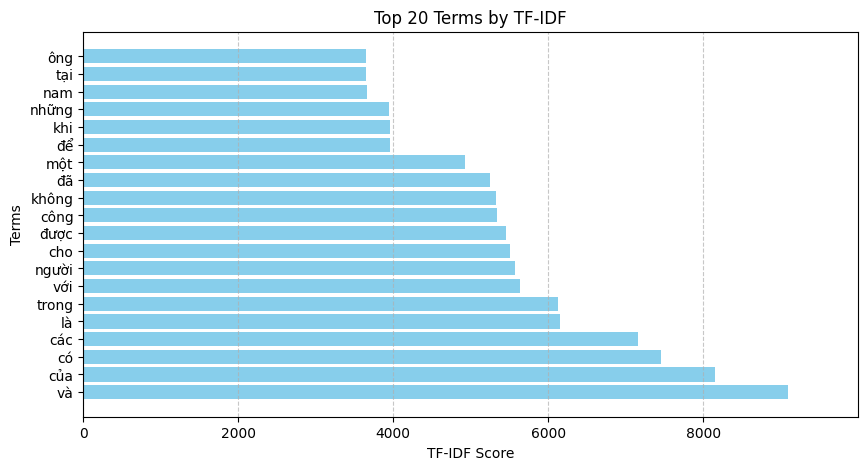

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(df['content'])

tfidf_sum = tfidf_matrix.sum(axis=0).A1
tfidf_freq = dict(zip(vectorizer_tfidf.get_feature_names_out(), tfidf_sum))

top_n = 20
top_tfidf_terms = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
terms, scores = zip(*top_tfidf_terms)


plt.figure(figsize=(10, 5))
plt.barh(terms, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Terms by TF-IDF')
plt.xlim(0, max(scores) * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 3.3 Unigram

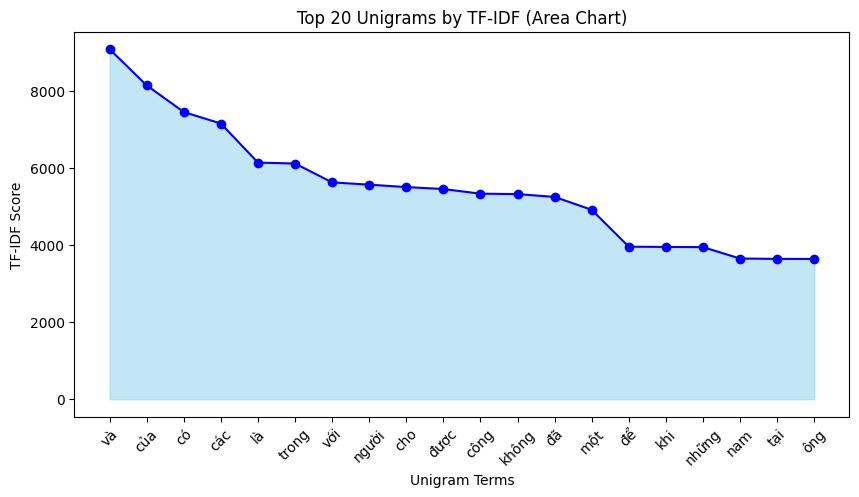

In [13]:
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
unigram_matrix = vectorizer_unigram.fit_transform(df['content'])

top_n = 20
top_tfidf_terms = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
terms_unigram, scores_unigram = zip(*top_tfidf_terms)

# Vẽ biểu đồ area chart
plt.figure(figsize=(10, 5))
plt.fill_between(terms_unigram, scores_unigram, color='skyblue', alpha=0.5)
plt.plot(terms_unigram, scores_unigram, marker='o', color='blue')
plt.xlabel('Unigram Terms')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Unigrams by TF-IDF (Area Chart)')
plt.xticks(rotation=45)
plt.show()